2020 데이터사이언스 프로젝트 최종 발표

# 국내 병원의 개/폐업 예측


팀원 : 김영민, 강민정


본 프로젝트는 병원에 대한 회계 데이터를 통해 국내 병원 개/폐업 예측한다.

(1) KDD 분석 절차에 따라 진행되며 EDA의 시각화를 통해  데이터의 특징 파악

(2) 머신러닝 모델과 인공 신경망 모델의 성능을 비교하고 이를 통해 보다 높은 정확도를 얻어냄

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 데이터 설명

train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보 

test.csv - 폐업 여부를 제외하고 train.csv와 동일 

sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1, close 예측일 경우 0.



inst_id - 각 파일에서의 병원 고유 번호

OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함

sido – 병원의 광역 지역 정보

sgg – 병원의 시군구 자료

openDate – 병원 설립일

bedCount - 병원이 갖추고 있는 병상의 수

instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

·        종합병원 : 입원환자 100명 이상 수용 가능

·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능

·        의원 : 입원 환자 30명 이하 수용 가능

·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  

 

revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함

salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함

sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

salary1 – 급여, 2017(회계년도)년 데이터를 의미함

noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함

noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함

Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함

ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함

Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함

liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함

quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함

receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함

inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함

nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함

tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함

OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함

receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함

debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함

liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함

shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함

NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함

longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함

netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함

surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

 

revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함

salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함

sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함

salary2 – 급여, 2016(회계년도)년 데이터를 의미함

noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함

noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함

interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함

ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함

profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함

liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함

quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함

receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함

inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함

nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함

tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함

OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함

receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함

Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함

liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함

shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함

NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함

longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함

netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함

surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함

employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함

employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함

ownerChange – 대표자의 변동 

In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/hospital close or open/train.csv',parse_dates=['openDate']) # date 형식으로 되어 있으므로 datetime type 으로 변환 호출
test=pd.read_csv('/content/gdrive/My Drive/hospital close or open/test.csv',parse_dates=['openDate'])
answer = pd.read_csv('/content/gdrive/My Drive/hospital close or open/submission_sample.csv')

In [ ]:
train_len = train.shape[0]
train_id = train.inst_id
test_len = test.shape[0]
test_id = test.inst_id
# 나중에 train과 test 따로 분류할 때 필요한 것들
merge_data = pd.concat([train,test]).reset_index() # data 병합
data=merge_data.copy()

In [ ]:
test.shape

(127, 58)

# EDA

In [ ]:
data.head()

,index,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,0,1,open,choongnam,73,2007-12-28,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,225169678.0,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.0,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,207829685.0,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62,64,same
1,1,3,open,gyeongnam,32,1997-04-01,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801,813,same
2,2,4,open,gyeonggi,89,2016-12-28,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,41864754.0,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234,1,same
3,3,7,open,incheon,141,2000-08-14,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,902830288.0,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.0,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,838387466.0,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663,663,same
4,4,9,open,gyeongnam,32,2005-09-01,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,80749696.0,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.0,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,32642585.0,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206,197,same


In [ ]:
train.shape

(301, 58)

In [ ]:
# 결측치 확인
train.isnull().sum()/train.shape[0]*100

inst_id               0.000000
OC                    0.000000
sido                  0.000000
sgg                   0.000000
openDate              0.000000
bedCount              1.661130
instkind              0.332226
revenue1              2.657807
salescost1            2.657807
sga1                  2.657807
salary1               2.657807
noi1                  2.657807
noe1                  2.657807
interest1             2.657807
ctax1                 2.657807
profit1               2.657807
liquidAsset1          2.657807
quickAsset1           2.657807
receivableS1          2.657807
inventoryAsset1       2.657807
nonCAsset1            2.657807
tanAsset1             2.657807
OnonCAsset1           2.657807
receivableL1          2.657807
debt1                 2.657807
liquidLiabilities1    2.657807
shortLoan1            2.657807
NCLiabilities1        2.657807
longLoan1             2.657807
netAsset1             2.657807
surplus1              2.657807
revenue2              2.657807
salescos

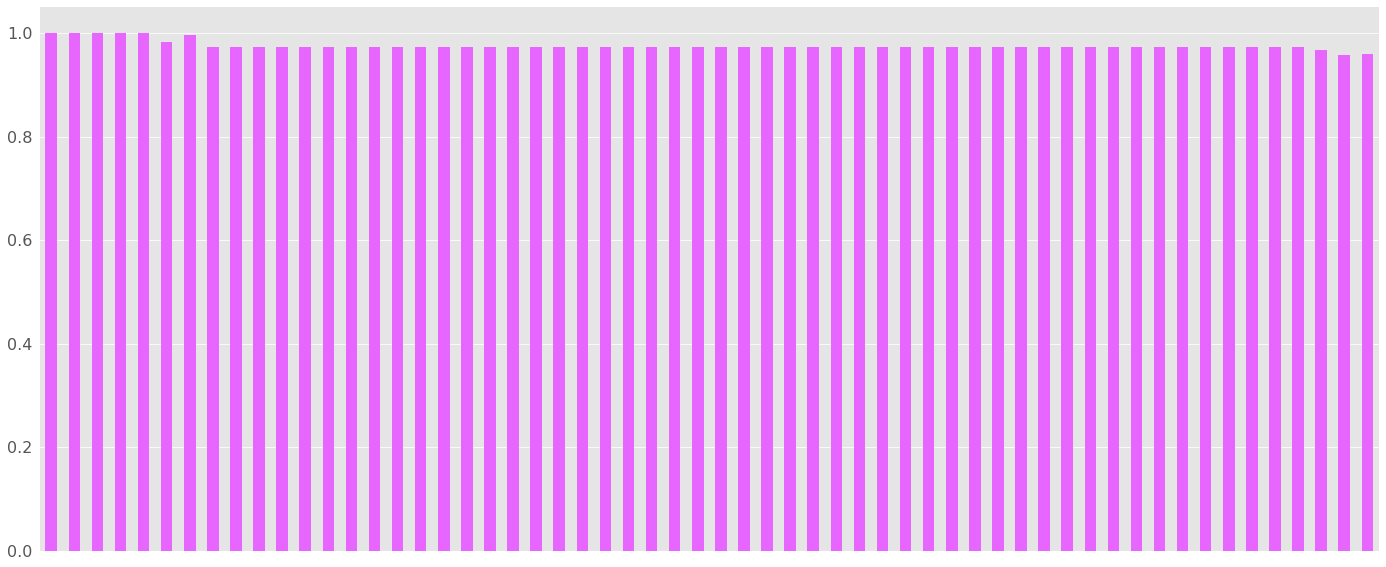

In [ ]:
import missingno as msno
msno.bar(train,color=(0.9,0.4,1)) # 결측치가 거의 없음을 알 수 있다.

In [ ]:
data.describe(include='object')

,OC,sido,instkind,employee1,employee2,ownerChange
count,301,428,425,410.0,400.0,401
unique,2,17,7,268.0,263.0,2
top,open,gyeonggi,nursing_hospital,73.0,70.0,same
freq,286,68,207,6.0,6.0,348


In [ ]:
data.describe()

,index,inst_id,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,428.000000,428.000000,428.000000,415.000000,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02
mean,124.184579,215.154206,85.436916,153.474699,1.448543e+10,2.600554e+09,1.125100e+10,6.180720e+09,3.437587e+08,6.188967e+08,2.257509e+08,8.935490e+07,2.651644e+08,3.800178e+09,3.659224e+09,7.492878e+08,1.342707e+08,1.279572e+10,1.183862e+10,3.598601e+08,9.612425e+05,1.014456e+10,5.099996e+09,2.107920e+09,5.234815e+09,3.112421e+09,6.175341e+09,1.481226e+09,1.319103e+10,2.380418e+09,1.007089e+10,5.504214e+09,2.855701e+08,6.291298e+08,2.184204e+08,7.226584e+07,3.253740e+08,3.488588e+09,3.353887e+09,6.336579e+08,1.246209e+08,1.159619e+10,1.076116e+10,3.316925e+08,1.619825e+05,9.268181e+09,4.390742e+09,1.710907e+09,5.076444e+09,3.240094e+09,5.525791e+09,1.178941e+09
std,85.469723,124.453370,51.867136,121.469400,2.429913e+10,9.986687e+09,1.684542e+10,9.483958e+09,9.418323e+08,1.335157e+09,3.444631e+08,2.682287e+08,1.373525e+09,6.682408e+09,6.470950e+09,1.721884e+09,2.767994e+08,1.892751e+10,1.761218e+10,9.739191e+08,1.631077e+07,1.553113e+10,8.355798e+09,4.105065e+09,8.916033e+09,5.126111e+09,1.198735e+10,7.548149e+09,2.257143e+10,9.104843e+09,1.546733e+10,8.733907e+09,7.271677e+08,1.320242e+09,3.830729e+08,2.370850e+08,1.316972e+09,6.582253e+09,6.359864e+09,1.584505e+09,2.680708e+08,1.829542e+10,1.715745e+10,9.086105e+08,3.193096e+06,1.513045e+10,7.795737e+09,3.673698e+09,9.220942e+09,5.661182e+09,1.051916e+10,4.720339e+09
min,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.734451e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.019624e+10,-8.636718e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.645265e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-8.600000e+09
25%,53.000000,107.750000,37.750000,63.000000,3.238344e+09,0.000000e+00,2.880497e+09,1.629412e+09,9.943713e+06,8.032983e+07,5.149973e+07,0.000000e+00,0.000000e+00,7.493618e+08,7.129472e+08,7.493450e+04,3.387425e+06,3.415747e+09,3.012105e+09,1.953452e+06,0.000000e+00,2.033662e+09,5.294816e+08,0.000000e+00,5.930316e+08,0.000000e+00,1.381459e+09,0.000000e+00,2.785462e+09,0.000000e+00,2.298428e+09,1.352012e+09,6.499917e+06,6.147118e+07,3.303029e+07,0.000000e+00,0.000000e+00,4.521446e+08,4.288854e+08,0.000000e+00,5.694805e+05,2.492128e+09,2.399974e+09,0.000000e+00,0.000000e+00,1.332548e+09,3.006586e+08,0.000000e+00,2.597232e+07,0.000000e+00,9.690131e+08,0.000000e+00
50%,106.500000,214.500000,79.500000,143.000000,5.801359e+09,2.055491e+08,5.047266e+09,2.810168e+09,4.747870e+07,2.032758e+0

In [ ]:
import plotly.express as px # 전체 open close
oc = pd.DataFrame(train['OC'].value_counts())
oc['status']=oc.index
oc.rename(columns={"OC":"count"},inplace=True)
fig=px.pie(oc,values="count",names="status",title="Open or Close?",template='seaborn')
fig.update_traces(rotation=90,pull=0.05,textinfo="value+percent+label")
fig.show()

Text(0.5, 1.0, 'Distribution of hospitals by region(+OC)')

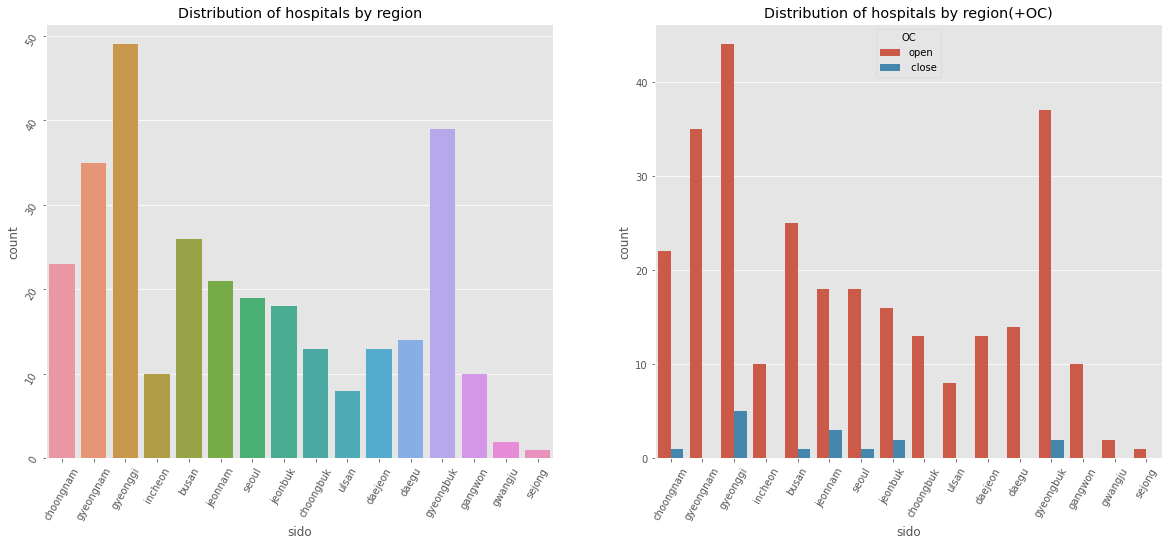

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
sns.countplot(train['sido'],ax=ax1)
ax1.set(title="Distribution of hospitals by region") #지역별 병원 분포
ax1.tick_params(labelrotation=60)

sns.countplot(train['sido'],hue=train['OC'],ax=ax2)
plt.xticks(rotation=60)
plt.title("Distribution of hospitals by region(+OC)") # 지역별 병원 분포에 open close

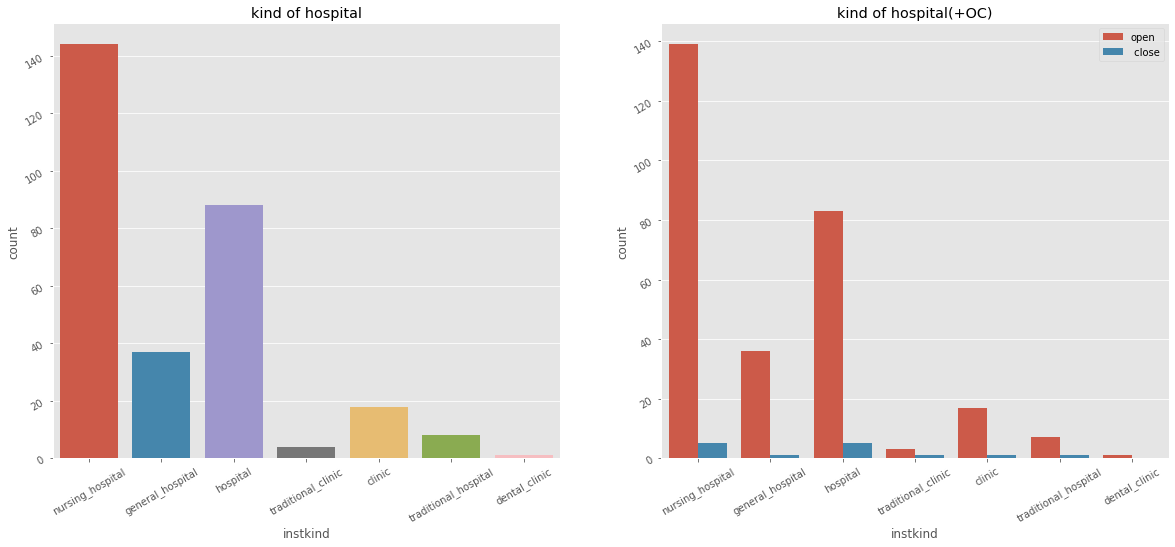

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
sns.countplot(train['instkind'],ax=ax1)
ax1.set(title='kind of hospital') # 병원 종류
ax1.tick_params(labelrotation=30)
sns.countplot(train['instkind'],hue=train['OC'],ax=ax2)
ax2.set(title='kind of hospital(+OC)') # 병원 종류 + open close
ax2.tick_params(labelrotation=30)
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Did they change the owner?')

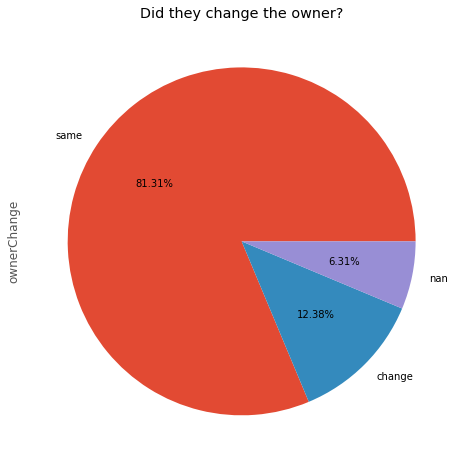

In [ ]:
plt.figure(figsize=(12,8))
data['ownerChange'].value_counts(dropna=False).plot(kind='pie',autopct="%.2f%%")
plt.title("Did they change the owner?") # 오너가 바뀌었냐

# PreProcessing

In [ ]:
data['OC'] = data['OC'].apply(lambda x: x.lstrip() if type(x) == str else x) # close가 안이쁘게 저장되어 있음

In [ ]:
for i in range(data.shape[0]): # employee가 변화 없다고 가정
    if pd.isnull(data['employee1'][i]) != pd.isnull(data['employee2'][i]): # 직원 하나 있고 하나 없을때
        if pd.isnull(data['employee1'][i]) == True: 
            data['employee1'][i] = data['employee2'][i]
        elif pd.isnull(data['employee2'][i]) == True:
            data['employee2'][i] = data['employee1'][i]
    else:
        continue

In [ ]:
# 직원 수 변화
def change_type(x):
    if type(x) == str:
        x= x.replace(',','') # ,가 있는게 있음
        return float(x)
    else:
        return x
data['employee1'] = data['employee1'].apply(lambda x: change_type(x))
data['employee2'] = data['employee2'].apply(lambda x: change_type(x))
data['employee_change']=data['employee1']-data['employee2']

In [ ]:
import datetime as dt
data['openYear'] = data['openDate'].dt.year # 오픈 연도만 저장
data.drop('openDate',axis=1,inplace=True) # 자세한 날짜 필요 없으므로 삭제

In [ ]:
debt = ['debt1','debt2','liquidLiabilities1','liquidLiabilities2','shortLoan1','shortLoan2','NCLiabilities1','NCLiabilities2',
       'longLoan1','longLoan2'] # 부채는 모두 마이너스 처리
for i in debt:
    data[i]=data[i].apply(lambda x: 0 if x==0 else -x)
data.head()

,index,inst_id,OC,sido,sgg,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,employee_change,openYear
0,0,1,open,choongnam,73,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,225169678.0,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,-6.828260e+08,-2.013237e+08,0.000000e+00,-4.815023e+08,-3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.0,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,207829685.0,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,-7.589937e+08,-2.228769e+08,0.000000e+00,-5.361169e+08,-3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,-2.0,2007.0
1,1,3,open,gyeongnam,32,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same,-12.0,1997.0
2,2,4,open,gyeonggi,89,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,41864754.0,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,-9.241434e+07,-9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,233.0,2016.0
3,3,7,open,incheon,141,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,902830288.0,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,-4.236380e+10,-2.799188e+10,-1.988520e+10,-1.437192e+10,-7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.0,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,838387466.0,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,-3.775501e+10,-1.701860e+10,-9.219427e+09,-2.073641e+10,-1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,0.0,2000.0
4,4,9,open,gyeongnam,32,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,80749696.0,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,-4.989811e+10,-2.890919e+10,-1.793038e+10,-2.098892e+10,-1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.0,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,32642585.0,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,-5.143259e+10,-3.007259e+10,-1.759375e+10,-2.136001e+10,-1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,9.0,2005.0


# PreProcessing
- Processing Missing value

In [ ]:
data['openYear'].fillna(int(data['openYear'].median()),inplace=True)

In [ ]:
data[data['bedCount'].isnull()][['bedCount','instkind']]

,bedCount,instkind
71,NaN,traditional_hospital
193,NaN,NaN
297,NaN,hospital
298,NaN,hospital
300,NaN,traditional_hospital
311,NaN,traditional_clinic
323,NaN,hospital
341,NaN,nursing_hospital
379,NaN,hospital
385,NaN,nursing_hospital


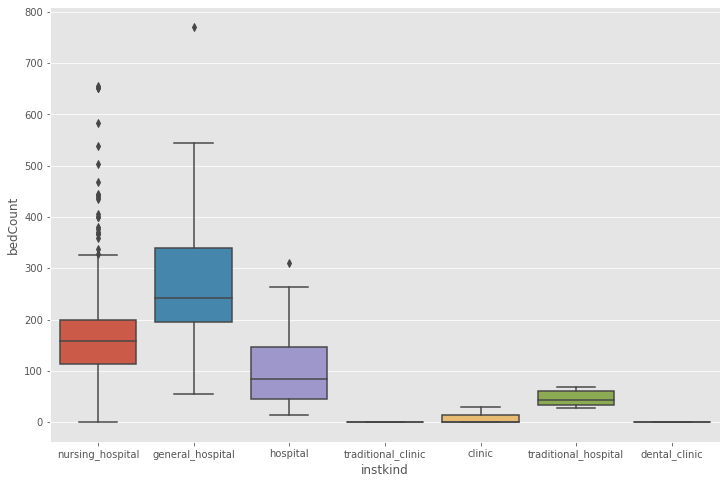

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data['instkind'],y=data['bedCount'])

# #### 이상치가 많으므로 결측치 대체는 중위값으로 한다.

In [ ]:
data['bedCount'].fillna(data.groupby('instkind')['bedCount'].transform('median'),inplace=True)

In [ ]:
data[data['bedCount'].isnull()][['bedCount','instkind']] # 둘다 결측치인 것은 영향 안받음

,bedCount,instkind
193,NaN,NaN
426,NaN,NaN


In [ ]:
data[data['instkind'].isnull()][['bedCount','instkind']] # instkind 결측치 확인

,bedCount,instkind
193,NaN,NaN
421,49.0,NaN
426,NaN,NaN


In [ ]:
data.groupby('instkind')['bedCount'].median() # bedCount 가 49는 traditional hospital에 가까움으로 이 값으로 대체

instkind
clinic                    0.0
dental_clinic             0.0
general_hospital        243.0
hospital                 85.0
nursing_hospital        157.5
traditional_clinic        0.0
traditional_hospital     44.0
Name: bedCount, dtype: float64

In [ ]:
data['instkind'].iloc[421] = 'traditional_hospital'

In [ ]:
data[['employee1','employee2','bedCount']].corr() # 직원 수와 bedCount의 상관관계가 0.5로 약간 높은 양의 상관관계가 있다.

,employee1,employee2,bedCount
employee1,1.000000,0.972793,0.505255
employee2,0.972793,1.000000,0.509500
bedCount,0.505255,0.509500,1.000000


In [ ]:
# 위 상관계수를 기반으로 직원 수에 따라서 bedCount->bedCOunt 와 instkind 상관관계 높음(데이터 설명에 의해)
data[data['instkind'].isnull()]

,index,inst_id,OC,sido,sgg,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,employee_change,openYear
193,193,281,close,gyeonggi,12,NaN,NaN,3.054388e+08,2.241614e+07,4.674753e+08,2.548688e+08,13451554.0,9.012973e+07,4239523.0,0.0,-2.611308e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.342966e+08,6.435569e+07,8.693647e+08,6.757184e+08,1333.0,2.431707e+07,5929772.0,0.0,-4.237396e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,15.0,15.0,change,0.0,2012.0
426,125,430,NaN,jeju,76,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,1.514547e+09,85098148.0,1.270081e+09,837926647.0,31802061.0,1.417343e+09,1.028286e+10,9.002630e+09,15569326.0,1.280235e+09,2.952030e+10,8.782117e+09,7.537349e+09,0.0,-3.859089e+10,-9.342814e+09,0.0,-2.924807e+10,-2.563120e+10,1.212281e+09,0.0,4.758477e+10,4.015853e+10,5.061219e+09,1.404341e+09,99795507.0,1.274426e+09,843338692.0,0.0,1.190396e+09,7.848233e+09,6.707102e+09,15569326.0,1.141131e+09,2.915067e+10,7.869001e+09,7.112780e+09,0.0,-3.720397e+10,-8.485918e+09,0.0,-2.871805e+10,-2.563120e+10,-205062936.0,0.0,363.0,343.0,same,20.0,2001.0


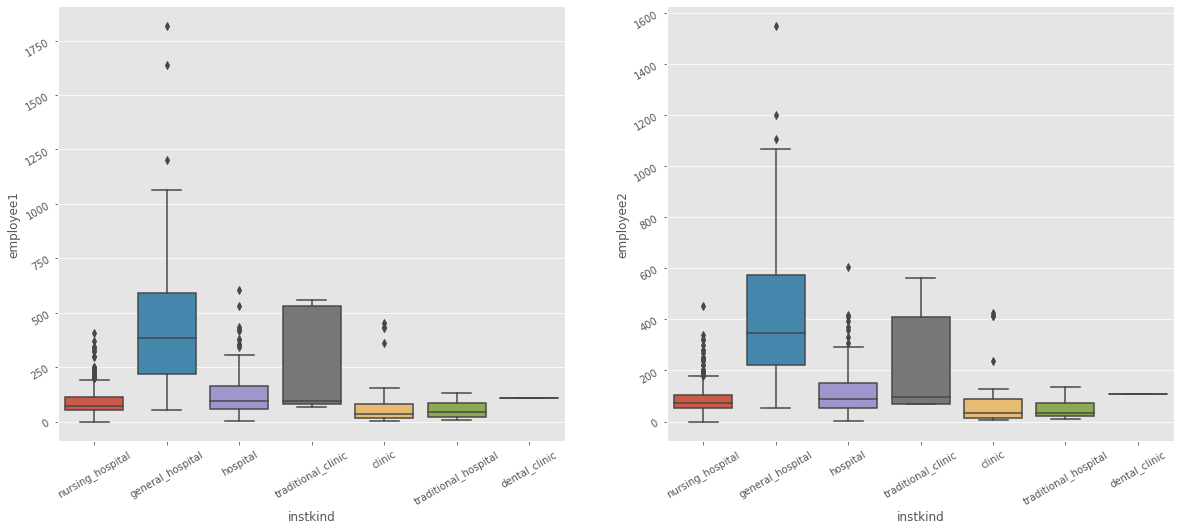

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
sns.boxplot(data=data,x='instkind',y='employee1',ax=ax1)
sns.boxplot(data=data,x='instkind',y='employee2',ax=ax2)
ax1.tick_params(labelrotation=30)
ax2.tick_params(labelrotation=30)

In [ ]:
data.groupby('instkind')['employee1'].median()

instkind
clinic                   35.0
dental_clinic           107.0
general_hospital        385.0
hospital                 94.0
nursing_hospital         73.5
traditional_clinic       93.0
traditional_hospital     42.0
Name: employee1, dtype: float64

In [ ]:
# 15 = clinc
# 343 = general_hospital
data['instkind'].iloc[193] = 'clinic'
data['instkind'].iloc[426] = 'general_hospital'
data['bedCount'].iloc[193] = 0 # clinc의 중위값으로 대체
data['bedCount'].iloc[426] = 243 # general_hospital 의 중위값으로 대체

In [ ]:
data['ownerChange'].fillna(data['ownerChange'].mode()[0],inplace=True) # 최빈값으로 대체

- 직원 수 결측치 처리

In [ ]:
df=pd.DataFrame(columns=['col','corr'])
for i in range(len(data.corr().keys())):
    df.loc[i,'col'] = data.corr().keys()[i]
    df.loc[i,'corr'] = data.corr()['employee1'][i]
df

,col,corr
0,index,-0.235603
1,inst_id,-0.271752
2,sgg,0.0251274
3,bedCount,0.507025
4,revenue1,0.88632
5,salescost1,0.593692
6,sga1,0.868367
7,salary1,0.870879
8,noi1,0.585692
9,noe1,0.621877


In [ ]:
corr_features=[]
for i in df[abs(df['corr'])>0.7].reset_index()['col']: # 해당년도의 변수만 고려
    if i[-1] != '2':
        corr_features.append(i)
corr_features

['revenue1',
 'sga1',
 'salary1',
 'liquidAsset1',
 'quickAsset1',
 'nonCAsset1',
 'tanAsset1',
 'debt1',
 'liquidLiabilities1',
 'employee1']

In [ ]:
emp = data[corr_features]
train_emp = emp[emp['employee1'].notnull()]
train_emp.dropna(axis=0,inplace=True)
train_emp # 회계데이터가 결측치이면 삭제

,revenue1,sga1,salary1,liquidAsset1,quickAsset1,nonCAsset1,tanAsset1,debt1,liquidLiabilities1,employee1
0,4.217530e+09,3.961135e+09,2.033835e+09,1.012700e+09,9.976719e+08,2.514586e+09,2.360684e+09,-6.828260e+08,-2.013237e+08,62.0
2,1.004522e+09,4.472197e+08,2.964023e+08,2.724421e+08,2.536822e+08,1.204810e+08,1.204810e+08,-9.241434e+07,-9.241434e+07,234.0
3,7.250734e+10,7.067740e+10,3.178605e+10,1.304154e+10,1.153475e+10,4.317936e+10,3.832078e+10,-4.236380e+10,-2.799188e+10,663.0
4,4.904354e+10,4.765605e+10,2.446078e+10,6.317084e+09,5.873265e+09,4.366733e+10,4.330613e+10,-4.989811e+10,-2.890919e+10,206.0
5,3.358054e+10,2.372791e+10,1.665533e+10,5.635105e+09,5.481680e+09,1.864970e+10,1.849938e+10,0.000000e+00,-1.849938e+10,397.0
...,...,...,...,...,...,...,...,...,...,...
421,5.583625e+08,5.482900e+08,2.826852e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21.0
422,4.471030e+08,2.581514e+08,1.191270e+08,2.811359e+08,2.336135e+08,2.143994e+09,2.143994e+09,-5.800356e+07,-3.354087e+07,111.0
423,2.233031e+10,1.849255e+10,1.232241e+10,1.829292e+10,1.818429e+10,1.307623e+10,1.265639e+10,-1.582736e+10,-1.285973e+10,560.0
424,1.833906e+10,1.760117e+10,6.824241e+09,3.706256e+09,3.706256e+09,7.787147e+09,7.339147e+09,-1.938710e+09,-1.893267e+09,132.0


In [ ]:
test_emp = emp[emp['employee1'].isnull()]
test_emp

,revenue1,sga1,salary1,liquidAsset1,quickAsset1,nonCAsset1,tanAsset1,debt1,liquidLiabilities1,employee1
48,8.872427e+09,7.638920e+09,4.488958e+09,1.302115e+09,1.186743e+09,8.347311e+09,8.178953e+09,-6.749132e+09,-5.759132e+09,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,5.423357e+09,5.212041e+09,2.958250e+09,2.851343e+09,2.734711e+09,5.453158e+09,5.438850e+09,-4.457667e+09,-1.864667e+09,NaN
212,2.233031e+10,1.849255e+10,1.232241e+10,1.829292e+10,1.818429e+10,1.307623e+10,1.265639e+10,-1.582736e+10,-1.285973e+10,NaN
242,6.845503e+08,5.619356e+08,3.014000e+08,1.332665e+09,1.331507e+09,7.721058e+08,5.021058e+08,-9.528087e+07,-9.491087e+07,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,3.007769e+09,2.258240e+09,1.775322e+09,9.443247e+08,8.065135e+08,2.105344e+09,1.999416e+09,-1.898375e+09,-3.590747e+08,NaN
285,9.618709e+09,9.751211e+09,4.979714e+09,3.764172e+09,3.597632e+09,6.189316e+09,4.821055e+09,-4.946246e+09,-1.736071e+09,NaN
298,0.000000e+00,5.479428e+07,7.500000e+06,3.867238e+09,3.867238e+09,5.569636e+09,5.419756e+09,-6.249466e+09,-2.050342e+09,NaN
303,2.326031e+10,2.308749e+10,1.168734e+10,1.265313e+10,1.133922e+10,2.945467e+10,2.830632e+10,0.000000e+00,-2.830632e+10,NaN


In [ ]:
test_emp.drop([test_emp.index[1],test_emp.index[5]],inplace=True)

In [ ]:
train_x1 = train_emp.drop(['employee1'],axis=1)
train_y1 = train_emp['employee1']
test_x1 = test_emp.drop(['employee1'],axis=1)
test_y1 = test_emp['employee1']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train_x1,train_y1)
pred1 = rf.predict(test_x1)
pred1

array([103.91  ,  81.69  , 435.4   ,  21.91  ,  61.27  , 149.8275,
       115.36  , 228.09  ,  90.33  , 114.19  , 225.2   , 172.652 ,
        44.24  , 140.02  , 124.75  ])

In [ ]:
df=pd.DataFrame(columns=['col','corr'])
for i in range(len(data.corr().keys())):
    df.loc[i,'col'] = data.corr().keys()[i]
    df.loc[i,'corr'] = data.corr()['employee2'][i]
df

,col,corr
0,index,-0.252003
1,inst_id,-0.284224
2,sgg,0.0232896
3,bedCount,0.511327
4,revenue1,0.871015
5,salescost1,0.593576
6,sga1,0.855941
7,salary1,0.847373
8,noi1,0.592255
9,noe1,0.584647


In [ ]:
corr_features2=[]
for i in df[abs(df['corr'])>0.7].reset_index()['col']: # 해당년도의 변수만 고려
    if i[-1] != '1':
        corr_features2.append(i)
corr_features2

['revenue2',
 'sga2',
 'salary2',
 'noi2',
 'liquidAsset2',
 'quickAsset2',
 'nonCAsset2',
 'tanAsset2',
 'debt2',
 'liquidLiabilities2',
 'employee2']

In [ ]:
emp2 = data[corr_features2]
train_emp2 = emp2[emp2['employee2'].notnull()]
train_emp2.dropna(axis=0,inplace=True)
train_emp2 # 회계데이터가 결측치이면 삭제

,revenue2,sga2,salary2,noi2,liquidAsset2,quickAsset2,nonCAsset2,tanAsset2,debt2,liquidLiabilities2,employee2
0,4.297848e+09,4.057422e+09,2.063787e+09,16194675.0,8.301695e+08,8.165705e+08,2.548115e+09,2.386263e+09,-7.589937e+08,-2.228769e+08,64.0
2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
3,6.685834e+10,6.492419e+10,2.971135e+10,476807804.0,1.112572e+10,9.890540e+09,3.958356e+10,3.485576e+10,-3.775501e+10,-1.701860e+10,663.0
4,4.808280e+10,4.712580e+10,2.346004e+10,597748128.0,4.906776e+09,4.464017e+09,4.653138e+10,4.562945e+10,-5.143259e+10,-3.007259e+10,197.0
5,3.433445e+10,2.409622e+10,1.638792e+10,125681154.0,4.869419e+09,4.725857e+09,2.212715e+10,2.186113e+10,0.000000e+00,-2.186113e+10,390.0
...,...,...,...,...,...,...,...,...,...,...,...
421,1.160742e+09,7.614171e+08,4.590994e+08,1045466.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21.0
422,4.649570e+08,3.153264e+08,7.356901e+07,368343.0,3.813002e+07,0.000000e+00,2.212408e+09,2.212408e+09,-1.022401e+09,-4.924418e+07,111.0
423,2.239509e+10,1.805503e+10,1.138885e+10,483447584.0,1.708819e+10,1.701879e+10,1.239357e+10,1.173006e+10,-1.563217e+10,-1.288180e+10,560.0
424,1.911503e+10,1.824717e+10,7.250614e+09,41234195.0,4.588941e+09,4.588941e+09,7.162190e+09,6.820410e+09,-3.176628e+09,-1.376742e+09,137.0


In [ ]:
test_emp2 = emp2[emp2['employee2'].isnull()]
test_emp2.drop([test_emp2.index[1],test_emp2.index[5]],inplace=True)

In [ ]:
train_x2 = train_emp2.drop(['employee2'],axis=1)
train_y2 = train_emp2['employee2']
test_x2 = test_emp2.drop(['employee2'],axis=1)
test_y2 = test_emp2['employee2']

In [ ]:
rf.fit(train_x2,train_y2)
pred2 = rf.predict(test_x2)
pred2

array([114.43      ,  85.28      , 441.11      ,  10.78      ,
        53.94      , 139.71      ,  34.63      , 256.44      ,
       118.74      , 120.47      , 117.52412373, 154.46      ,
        43.04      , 145.51      , 110.92      ])

In [ ]:
idx = list(data[data['employee1'].isnull()].index)
idx.remove(60)
idx.remove(258)
idx

[48, 93, 212, 242, 263, 285, 298, 303, 314, 323, 353, 389, 394, 425, 427]

In [ ]:
data['employee1'][idx] = pred1
data['employee2'][idx] = pred2

In [ ]:
data.groupby('instkind')['employee1','employee2','bedCount'].median() # 두개 다 결측치인 것은 병원 종류별 중앙값으로 대체

,employee1,employee2,bedCount
instkind,,,
clinic,28.0,27.5,0.0
dental_clinic,107.0,109.0,0.0
general_hospital,377.0,346.0,243.0
hospital,96.5,90.0,85.0
nursing_hospital,74.5,74.0,157.5
traditional_clinic,86.0,82.5,0.0
traditional_hospital,42.0,34.0,44.0


In [ ]:
data['employee1'].iloc[60] = 75
data['employee2'].iloc[60] = 74
data['employee1'].iloc[258] = 28
data['employee2'].iloc[258] = 28

In [ ]:
data['employee1'] = data['employee1'].apply(lambda x: round(x)) # 직원 수 반올림
data['employee2'] = data['employee2'].apply(lambda x: round(x))

In [ ]:
data['employee_change'] = data['employee1'] - data['employee2'] #  update employee_change column

# Preprocessing
- 회계데이터 결측치 처리

In [ ]:
tmp2016=[]
tmp2017=[]
for i in data.columns:
  if i[-1] == '2':
    tmp2016.append(i)
  elif i[-1] == '1':
    tmp2017.append(i)
tmp2016.remove('employee2')
tmp2017.remove('employee1')
acc2016 = data[tmp2016]
acc2017 = data[tmp2017]

In [ ]:
zero_idx2016=[]
zero_idx2017=[]
for i in range(acc2016.shape[0]):
  if sum(acc2016.iloc[i].values==0) == 0:
    zero_idx2016.append(i)
for j in range(acc2017.shape[0]):
  if sum(acc2017.iloc[j].values==0) == 0:
    zero_idx2017.append(j)
print('2016: ',zero_idx2016) # 2016년 회계 데이터 전체가 0인 index들
print('2017: ',zero_idx2017) # 2017년 회계 데이터 전체가 0인 index들
# 회계데이터가 모두 0인 데이터는 없습니다. 나온 결과값 모두 결측치 값입니다.

2016:  [1, 14, 32, 55, 60, 248, 257, 258, 316, 357]
2017:  [1, 14, 32, 55, 60, 248, 257, 258, 316, 357]


In [ ]:
data['old'] = 2018-data['openYear'] # 2018년 데이터이므로 오픈한지 얼마나 지났는지

In [ ]:
from xgboost import XGBRegressor # xgb로 회계데이터 모델링
xgb = XGBRegressor(n_estimators=1000)

In [ ]:
df= data.drop(['index','inst_id','OC','sido','sgg','ownerChange','openYear','instkind','employee_change'],axis=1)

In [ ]:
idx=list(data.index)
for i in zero_idx2016:
  idx.remove(i)

In [ ]:
na_col = []
for i,j in zip(tmp2016,tmp2017):
  na_col.append(i)
  na_col.append(j)
na_col # 결측치가 있는 데이터 모아놓기

['revenue2',
 'revenue1',
 'salescost2',
 'salescost1',
 'sga2',
 'sga1',
 'salary2',
 'salary1',
 'noi2',
 'noi1',
 'noe2',
 'noe1',
 'interest2',
 'interest1',
 'ctax2',
 'ctax1',
 'profit2',
 'profit1',
 'liquidAsset2',
 'liquidAsset1',
 'quickAsset2',
 'quickAsset1',
 'receivableS2',
 'receivableS1',
 'inventoryAsset2',
 'inventoryAsset1',
 'nonCAsset2',
 'nonCAsset1',
 'tanAsset2',
 'tanAsset1',
 'OnonCAsset2',
 'OnonCAsset1',
 'receivableL2',
 'receivableL1',
 'debt2',
 'debt1',
 'liquidLiabilities2',
 'liquidLiabilities1',
 'shortLoan2',
 'shortLoan1',
 'NCLiabilities2',
 'NCLiabilities1',
 'longLoan2',
 'longLoan1',
 'netAsset2',
 'netAsset1',
 'surplus2',
 'surplus1']

In [ ]:
for i in na_col:
  train_x = df.drop(i,axis=1).iloc[idx]
  train_y = df[i].iloc[idx]
  test_x = df.drop(i,axis=1).iloc[zero_idx2016]
  xgb.fit(train_x,train_y)
  pred = xgb.predict(test_x)
  data[i][zero_idx2016] = pred
data.isnull().sum()

[05:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

index                0
inst_id              0
OC                 127
sido                 0
sgg                  0
                  ... 
employee2            0
ownerChange          0
employee_change      0
openYear             0
old                  0
Length: 61, dtype: int64

# Preprocessing
- final

In [ ]:
data['profit_diff'] = data['profit1'] - data['profit2']
data['debt_diff'] = data['debt1'] - data['debt2']
data['surplus_diff'] = data['surplus1'] - data['surplus2']
data['netasset_diff'] = data['netAsset1'] - data['netAsset2']

In [ ]:
dic={'open':1,'close':0}
data['OC'] = data['OC'].map(dic)

In [ ]:
dic={'same':1,'change':0}
data['ownerChange'] = data['ownerChange'].map(dic)

In [ ]:
data.drop(['sgg','openYear','index'],axis=1,inplace=True) # 필요없는 것 다른 것으로 대체할 수 있는 것은 삭제

In [ ]:
# 충남 충북 -> 충청
# 경남 경북 -> 경상
# 전남 전북 -> 전라
# 경기 -> 경기
# 강원 -> 강원
# 제주 -> 제주
# 인천 부산 대구 울산 세종 대전 광주 ->광역시

In [ ]:
sido_dic={"choongnam":"충청","choongbuk":"충청","gyeongnam":"경상","gyeongbuk":"경상", "jeonnam":'전라',"jeonbuk":"전라",
         'seoul':'서울','gangwon':'강원','jeju':'제주',"sejong":"광역시","daejeon":"광역시",
         "busan":"광역시","daegu":"광역시",'ulsan':"광역시","gwangju":'광역시','incheon':"광역시",'gyeonggi':"경기"}
data['sido'] = data.sido.map(sido_dic)

In [ ]:
from sklearn.preprocessing import OneHotEncoder # onehotencoding dataframe 변환 함수
def ohe_trans(data,col):
    ohe=OneHotEncoder()
    x= ohe.fit_transform(data[col].values.reshape(-1,1)).toarray()
    tp = []
    for i in range(data[col].unique().size): # onehot 컬럼 생성
        tp.append(col[0]+str(i)) 
    ohe_df = pd.DataFrame(x,columns = tp)
    return ohe_df


In [ ]:
ohe_sido = ohe_trans(data,'sido')
ohe_kind = ohe_trans(data,'instkind')
data.drop(['sido','instkind'],axis=1,inplace=True)

In [ ]:
data=pd.concat([data,ohe_sido,ohe_kind],axis=1)

In [ ]:
train_data = data.iloc[:train_len]
test_data = data.iloc[train_len:]

In [ ]:
train_data.drop('inst_id',axis=1,inplace=True)
test_data.drop('inst_id',axis=1,inplace=True)

# **MODELING**
- use ML(XGBCLASSIFIER,RANDOMFORESTCLASSIFIER)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rf = RandomForestClassifier(n_estimators = 1000)
xgb = XGBClassifier(n_estimators = 1000)

In [ ]:
train_x = train_data.drop('OC',axis=1)
train_y = train_data['OC']
test_x = test_data.drop('OC',axis=1)
test_y = test_data['OC']

In [ ]:
rf.fit(train_x,train_y)
pred_rf = rf.predict(test_x)
xgb.fit(train_x,train_y)
pred_xgb = xgb.predict(test_x)

In [ ]:
answer['OC'] = pred_rf
#answer.to_csv('rf_predict(hos oc).csv',index=False)

In [ ]:
answer['OC'] = pred_xgb
#answer.to_csv('xgb_predict(hos oc).csv',index=False)

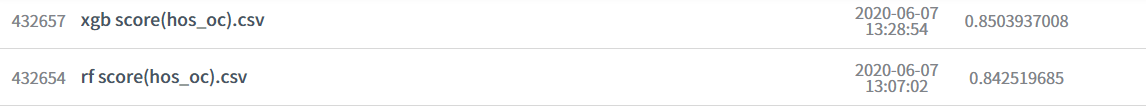

Text(0.5, 1.0, 'rf feature importances')

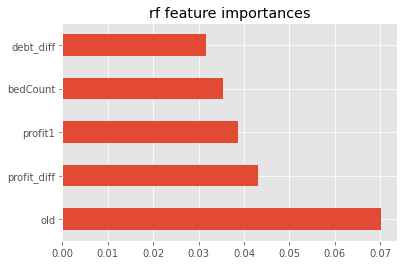

In [ ]:
feat_importance=pd.Series(rf.feature_importances_,index=train_x.columns) 
feat_importance.nlargest(5).plot(kind='barh') 
plt.title('rf feature importances')


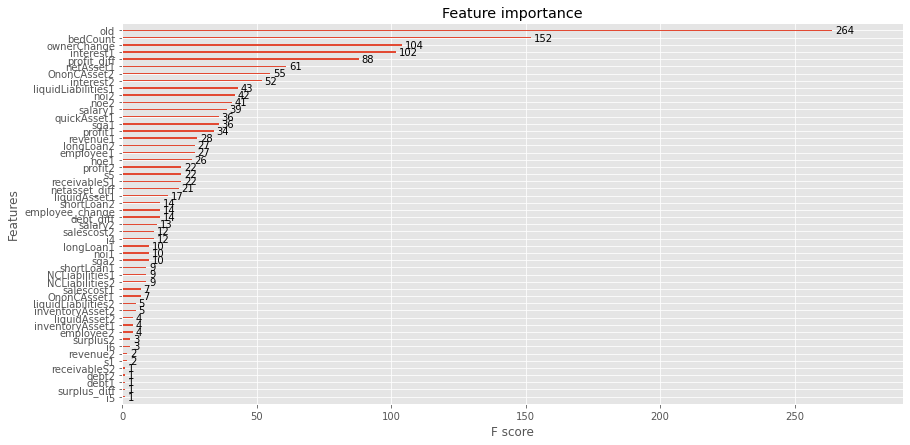

In [ ]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(xgb)

- 두 모델 공통적으로 old 변수가 OC를 가장 판단하는데 가장 중요한 변수로 작용하였다. 이어서 profit_diff,bedCount 등의 변수가 예측하는데 중요한 변수로 되었다.

# **MODELING**
- 인공신경망

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

# + CNN할때 필요한 것
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
train_df = train_data.drop(['OC'],axis=1)
train_OC = train_data['OC']

In [ ]:
from sklearn.model_selection import train_test_split # 검정용 데이터 생성
valid_train_x,valid_x,valid_train_y,valid_y = train_test_split(train_df,train_OC,test_size=.2,random_state=42)

valid_train_tensor = torch.tensor(valid_train_x.values,dtype=torch.float) # 검정용 데이터 train set (학습 x 부분)
valid_train_tensor_y = torch.tensor(valid_train_y.values,dtype=torch.float) # 검정용 데이터 train set (학습 y 부분= 정답)

train_tensor = valid_train_tensor.type(torch.FloatTensor).to(device)
train_tensor_y = valid_train_tensor_y.type(torch.LongTensor).to(device)

valid_test_tensor = torch.tensor(valid_x.values,dtype=torch.float).to(device)

In [ ]:
num_epoch = 10000
lr = [0.005,0.002,0.0005,0.0002]
s_lr = [0.05,0.02,0.005,0.002] # 시그모이드는 학습률 크게

In [ ]:
# 활성화 함수를 변경 시키면서 성능 확인 필요

w = 73  # input의 개수
model = nn.Sequential(
          nn.Linear(1*w,6*w),
          nn.ReLU(),
          nn.Linear(6*w,10*w),
          nn.ReLU(),
          nn.Linear(10*w,6*w),
          nn.ReLU(),
          nn.Linear(6*w,1*w),
          nn.LeakyReLU(),
          nn.Linear(w,2), 
      )

loss_func = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(),lr=0.002)
#optimizer2 = optim.Adam(model.parmeters(),lr=0.0002)
model.to(device)

Sequential(
  (0): Linear(in_features=73, out_features=438, bias=True)
  (1): ReLU()
  (2): Linear(in_features=438, out_features=730, bias=True)
  (3): ReLU()
  (4): Linear(in_features=730, out_features=438, bias=True)
  (5): ReLU()
  (6): Linear(in_features=438, out_features=73, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=73, out_features=2, bias=True)
)

In [ ]:
# 모델 함수로 만들어서 계속 초기화 할 수 있도록

def model_RRRLR():
    w = 73  # input의 개수
    model = nn.Sequential(
          nn.Linear(1*w,6*w), nn.ReLU(),
          nn.Linear(6*w,10*w), nn.ReLU(),
          nn.Linear(10*w,6*w), nn.ReLU(),
          nn.Linear(6*w,1*w), nn.LeakyReLU(),
          nn.Linear(w,2) )
    loss_func = nn.CrossEntropyLoss()
    return model.to(device)

def model_RRRR():
    w = 73  # input의 개수
    model = nn.Sequential(
          nn.Linear(1*w,6*w), nn.ReLU(),
          nn.Linear(6*w,10*w), nn.ReLU(),
          nn.Linear(10*w,6*w), nn.ReLU(),
          nn.Linear(6*w,1*w), nn.ReLU(),
          nn.Linear(w,2) )
    loss_func = nn.CrossEntropyLoss()
    return model.to(device)

def model_RRRT():
    w = 73  # input의 개수
    model = nn.Sequential(
          nn.Linear(1*w,6*w), nn.ReLU(),
          nn.Linear(6*w,10*w), nn.ReLU(),
          nn.Linear(10*w,6*w), nn.ReLU(),
          nn.Linear(6*w,1*w), nn.Tanh(),
          nn.Linear(w,2) )
    loss_func = nn.CrossEntropyLoss()
    return model.to(device)

def model_SSSS():
    w = 73  # input의 개수
    model = nn.Sequential(
          nn.Linear(1*w,6*w), nn.Sigmoid(),
          nn.Linear(6*w,10*w), nn.Sigmoid(),
          nn.Linear(10*w,6*w), nn.Sigmoid(),
          nn.Linear(6*w,1*w), nn.Sigmoid(),
          nn.Linear(w,2) )
    loss_func = nn.CrossEntropyLoss()
    return model.to(device)

def model_TTTT():
    w = 73  # input의 개수
    model = nn.Sequential(
          nn.Linear(1*w,6*w), nn.Tanh(),
          nn.Linear(6*w,10*w), nn.Tanh(),
          nn.Linear(10*w,6*w), nn.Tanh(),
          nn.Linear(6*w,1*w), nn.Tanh(),
          nn.Linear(w,2) )
    loss_func = nn.CrossEntropyLoss()
    return model.to(device)

def model_LRLRLRLR():
    w = 73  # input의 개수
    model = nn.Sequential(
          nn.Linear(1*w,6*w), nn.LeakyReLU(),
          nn.Linear(6*w,10*w), nn.LeakyReLU(),
          nn.Linear(10*w,6*w), nn.LeakyReLU(),
          nn.Linear(6*w,1*w), nn.LeakyReLU(),
          nn.Linear(w,2) )
    loss_func = nn.CrossEntropyLoss()
    return model.to(device)

## ReLU - ReLU - RELU - LeakyReLU

In [ ]:
loss_array_array = []
model_array = []
for r in lr:
    loss_array = []
    model = model_RRRLR()
    optimizer = optim.Adam(model.parameters(),r)
    print("학습률 : {}".format(r))
    for i in range(num_epoch):
        optimizer.zero_grad()
        output = model(train_tensor).to(device)
        loss = loss_func(output,train_tensor_y)
        if i%1000==0:
            print(loss)
        loss.backward()
        optimizer.step()
        loss_array.append(loss)
    model_array.append(model)
    loss_array_array.append(loss_array)

학습률 : 0.005
tensor(1828784.7500, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(96.9898, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(37.1877, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(147.8693, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(88.9446, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(161.2969, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(31.0882, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(5843734.5000, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(71826., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(143222.9375, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.002
tensor(73652088., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(508.2491, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(115.1421, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(179.0111, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(18.8826, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(382.8789, device='cuda:0', grad_fn=<NllLossBackwa

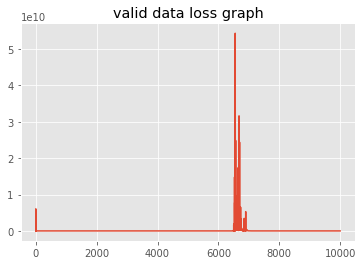

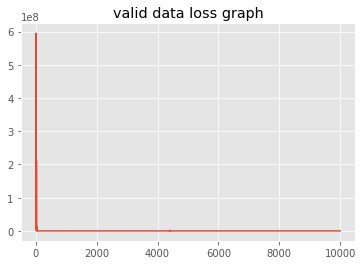

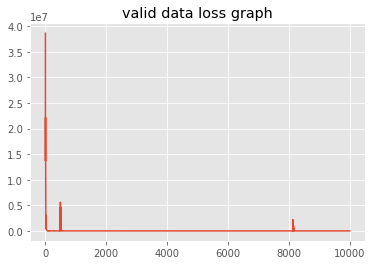

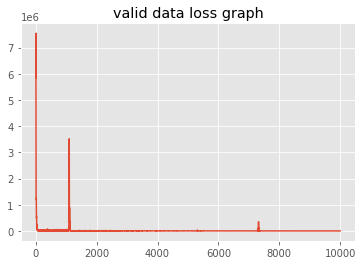

In [ ]:
for loss_array in loss_array_array:
    plt.plot(loss_array)
    plt.title("valid data loss graph")
    plt.show()

In [ ]:
output_array = []
for m in model_array:
    output = m(valid_test_tensor)
    output_array.append(output)
# output

In [ ]:
valid_result_array=[]
for output in output_array:
    valid_result = []
    for i in output:
        if i.argmax() == 1:
            valid_result.append(1)
        else:
            valid_result.append(0)
    valid_result_array.append(valid_result)

In [ ]:
from sklearn.metrics import accuracy_score # 정확도 측정
for valid_result in valid_result_array:
    print(accuracy_score(valid_y,valid_result)) # 오류나면 데이터type 통일해주기

0.9508196721311475
0.9344262295081968
0.9672131147540983
0.9672131147540983


## ReLU - ReLU - ReLU - ReLU

In [ ]:
loss_array_array = []
model_array = []
for r in lr:
    loss_array = []
    model = model_RRRR()
    optimizer = optim.Adam(model.parameters(),r)
    print("학습률 : {}".format(r))
    for i in range(num_epoch):
        optimizer.zero_grad()
        output = model(train_tensor).to(device)
        loss = loss_func(output,train_tensor_y)
        if i%5000==0:
            print(loss)
        loss.backward()
        optimizer.step()
        loss_array.append(loss)
    model_array.append(model)
    loss_array_array.append(loss_array)

학습률 : 0.005
tensor(29709250., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1632, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.002
tensor(59496948., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1333, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.0005
tensor(26882674., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(3630.6670, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.0002
tensor(5322987.5000, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(3424.7825, device='cuda:0', grad_fn=<NllLossBackward>)


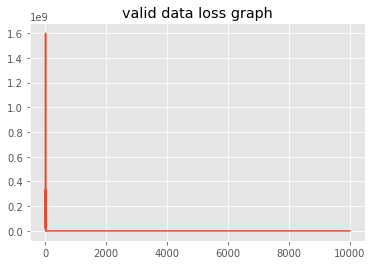

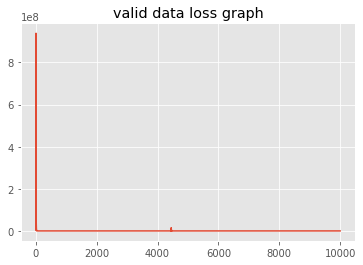

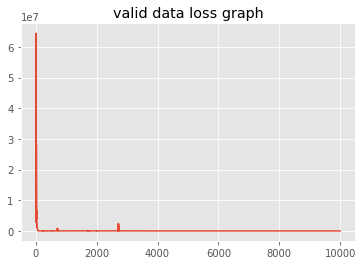

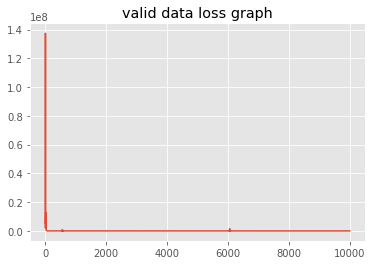

In [ ]:
for loss_array in loss_array_array:
    plt.plot(loss_array)
    plt.title("valid data loss graph")
    plt.show()

In [ ]:
output_array = []
for m in model_array:
    output = m(valid_test_tensor)
    output_array.append(output)

In [ ]:
valid_result_array=[]
for output in output_array:
    valid_result = []
    for i in output:
        if i.argmax() == 1:
            valid_result.append(1)
        else:
            valid_result.append(0)
    valid_result_array.append(valid_result)

In [ ]:
for valid_result in valid_result_array:
    print(accuracy_score(valid_y,valid_result)) # 오류나면 데이터type 통일해주기

0.9672131147540983
0.9508196721311475
0.9672131147540983
0.9672131147540983


## ReLU - ReLU - ReLU - Tanh

In [ ]:
loss_array_array = []
model_array = []
for r in lr:
    loss_array = []
    model = model_RRRT()
    optimizer = optim.Adam(model.parameters(),r)
    print("학습률 : {}".format(r))
    for i in range(num_epoch):
        optimizer.zero_grad()
        output = model(train_tensor).to(device)
        loss = loss_func(output,train_tensor_y)
        if i%5000==0:
            print(loss)
        loss.backward()
        optimizer.step()
        loss_array.append(loss)
    model_array.append(model)
    loss_array_array.append(loss_array)

학습률 : 0.005
tensor(0.5011, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0376, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.002
tensor(0.6251, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0227, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.0005
tensor(1.4855, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0687, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.0002
tensor(1.1225, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1099, device='cuda:0', grad_fn=<NllLossBackward>)


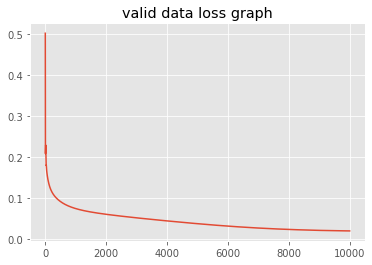

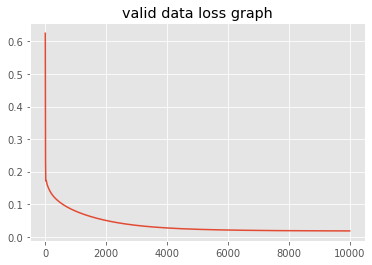

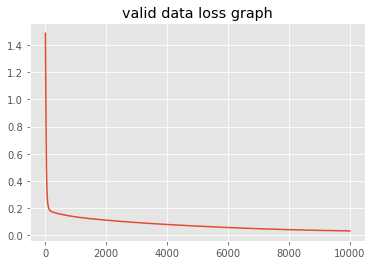

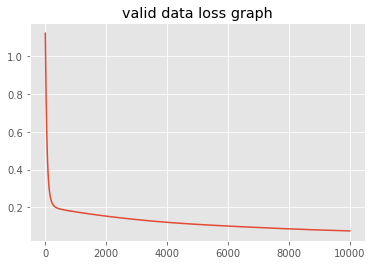

In [ ]:
for loss_array in loss_array_array:
    plt.plot(loss_array)
    plt.title("valid data loss graph")
    plt.show()

In [ ]:
output_array = []
for m in model_array:
    output = m(valid_test_tensor)
    output_array.append(output)

In [ ]:
valid_result_array=[]
for output in output_array:
    valid_result = []
    for i in output:
        if i.argmax() == 1:
            valid_result.append(1)
        else:
            valid_result.append(0)
    valid_result_array.append(valid_result)

In [ ]:
for valid_result in valid_result_array:
    print(accuracy_score(valid_y,valid_result)) # 오류나면 데이터type 통일해주기

0.8360655737704918
0.8852459016393442
0.9344262295081968
0.9180327868852459


## Sigmoid - Sigmoid - Sigmoid - Sigmoid

In [ ]:
loss_array_array = []
model_array = []
for r in s_lr:
    loss_array = []
    model = model_RRRT()
    optimizer = optim.Adam(model.parameters(),r)
    print("학습률 : {}".format(r))
    for i in range(num_epoch):
        optimizer.zero_grad()
        output = model(train_tensor).to(device)
        loss = loss_func(output,train_tensor_y)
        if i%5000==0:
            print(loss)
        loss.backward()
        optimizer.step()
        loss_array.append(loss)
    model_array.append(model)
    loss_array_array.append(loss_array)

학습률 : 0.05
tensor(0.5091, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0176, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.02
tensor(0.7074, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0199, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.005
tensor(1.7313, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0547, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.002
tensor(1.2300, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0447, device='cuda:0', grad_fn=<NllLossBackward>)


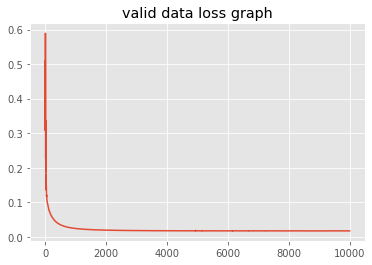

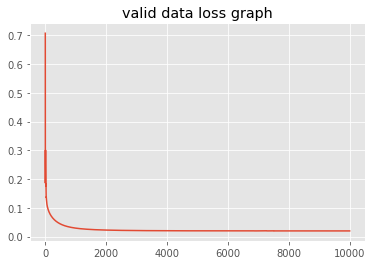

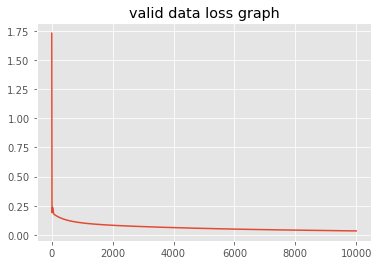

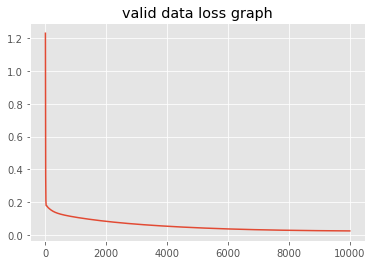

In [ ]:
for loss_array in loss_array_array:
    plt.plot(loss_array)
    plt.title("valid data loss graph")
    plt.show()

In [ ]:
output_array = []
for m in model_array:
    output = m(valid_test_tensor)
    output_array.append(output)

In [ ]:
valid_result_array=[]
for output in output_array:
    valid_result = []
    for i in output:
        if i.argmax() == 1:
            valid_result.append(1)
        else:
            valid_result.append(0)
    valid_result_array.append(valid_result)

In [ ]:
for valid_result in valid_result_array:
    print(accuracy_score(valid_y,valid_result)) # 오류나면 데이터type 통일해주기

0.9016393442622951
0.8852459016393442
0.819672131147541
0.9344262295081968


## Tanh - Tanh - Tanh - Tanh

In [ ]:
loss_array_array = []
model_array = []
for r in lr:
    loss_array = []
    model = model_TTTT()
    optimizer = optim.Adam(model.parameters(),r)
    print("학습률 : {}".format(r))
    for i in range(num_epoch):
        optimizer.zero_grad()
        output = model(train_tensor).to(device)
        loss = loss_func(output,train_tensor_y)
        if i%5000==0:
            print(loss)
        loss.backward()
        optimizer.step()
        loss_array.append(loss)
    model_array.append(model)
    loss_array_array.append(loss_array)

학습률 : 0.005
tensor(0.7940, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.002
tensor(0.6572, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.0005
tensor(0.6587, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.0002
tensor(0.7804, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)


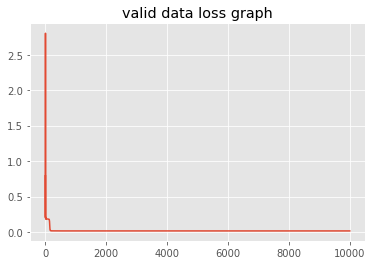

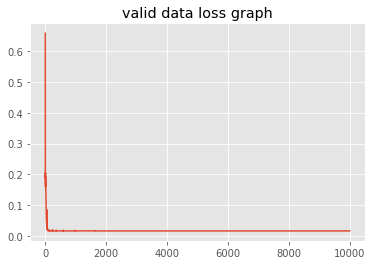

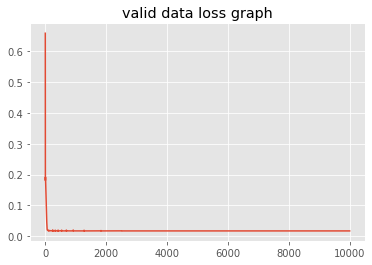

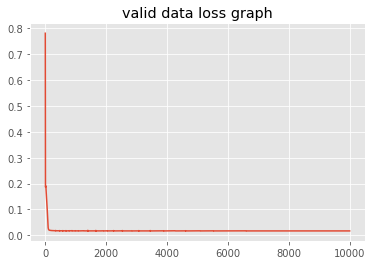

In [ ]:
for loss_array in loss_array_array:
    plt.plot(loss_array)
    plt.title("valid data loss graph")
    plt.show()

In [ ]:
output_array = []
for m in model_array:
    output = m(valid_test_tensor)
    output_array.append(output)

In [ ]:
valid_result_array=[]
for output in output_array:
    valid_result = []
    for i in output:
        if i.argmax() == 1:
            valid_result.append(1)
        else:
            valid_result.append(0)
    valid_result_array.append(valid_result)

In [ ]:
for valid_result in valid_result_array:
    print(accuracy_score(valid_y,valid_result)) # 오류나면 데이터type 통일해주기

0.9180327868852459
0.9508196721311475
0.9344262295081968
0.9508196721311475


## LeakyReLU - LeakyReLU - LeakyReLU - LeakyReLU

In [ ]:
loss_array_array = []
model_array = []
for r in lr:
    loss_array = []
    model = model_LRLRLRLR()
    optimizer = optim.Adam(model.parameters(),r)
    print("학습률 : {}".format(r))
    for i in range(num_epoch):
        optimizer.zero_grad()
        output = model(train_tensor).to(device)
        loss = loss_func(output,train_tensor_y)
        if i%5000==0:
            print(loss)
        loss.backward()
        optimizer.step()
        loss_array.append(loss)
    model_array.append(model)
    loss_array_array.append(loss_array)

학습률 : 0.005
tensor(2566436.2500, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(267.5387, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.002
tensor(11951636., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(902.5310, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.0005
tensor(14195371., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1443517.8750, device='cuda:0', grad_fn=<NllLossBackward>)
학습률 : 0.0002
tensor(2753409.5000, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2489.4126, device='cuda:0', grad_fn=<NllLossBackward>)


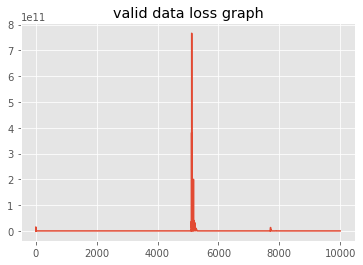

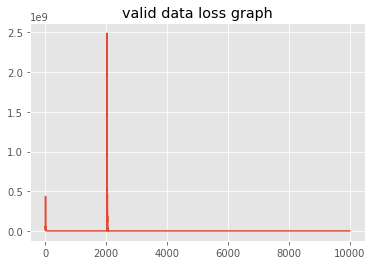

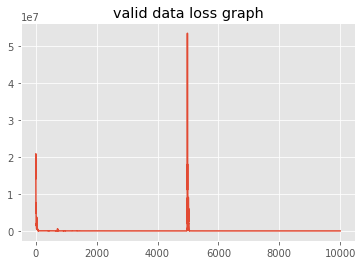

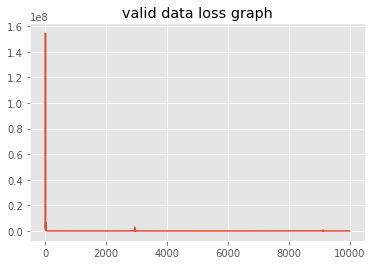

In [ ]:
for loss_array in loss_array_array:
    plt.plot(loss_array)
    plt.title("valid data loss graph")
    plt.show()

In [ ]:
output_array = []
for m in model_array:
    output = m(valid_test_tensor)
    output_array.append(output)

In [ ]:
valid_result_array=[]
for output in output_array:
    valid_result = []
    for i in output:
        if i.argmax() == 1:
            valid_result.append(1)
        else:
            valid_result.append(0)
    valid_result_array.append(valid_result)

In [ ]:
for valid_result in valid_result_array:
    print(accuracy_score(valid_y,valid_result)) # 오류나면 데이터type 통일해주기

0.9344262295081968
0.9508196721311475
0.9672131147540983
0.9672131147540983


## 정확도 측정 결과

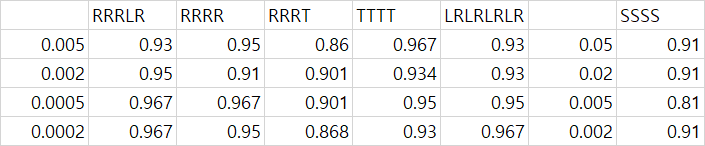

# Modeling test data

In [ ]:

train_df_tensor = torch.tensor(train_df.values,dtype=torch.float)
train_data_Output = torch.tensor(train_OC.values, dtype=torch.float)
test_df = test_data.drop('OC',axis=1)
test_df_tensor = torch.tensor(test_df.values,dtype=torch.float)

In [ ]:
num_epoch = 10000

# train_tensor = train_tensor.type(torch.FloatTensor)
#train_tensor = train_tensor.cuda() # GPU로 보냄
#noise = init.normal_(train_tensor,std=1)
# x = init.uniform_(train_tensor,-15,15)
lr = [0.005,0.002,0.0005,0.0002]

In [ ]:
# # 아래 코드는 특성의 개수가 73 -> 6*73 -> 10*73 -> 6*73 -> 73 -> 1개로 변하는 인공신경망입니다. 

# w = 73  # input의 개수
# model = nn.Sequential(
#           nn.Linear(1*w,6*w),
#           nn.ReLU(),
#           nn.Linear(6*w,10*w),
#           nn.ReLU(),
#           nn.Linear(10*w,6*w),
#           nn.ReLU(),
#           nn.Linear(6*w,1*w),
#           nn.LeakyReLU(),
#           nn.Linear(w,2),
#       )

# loss_func = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(),lr=0.002)
# #optimizer2 = optim.Adam(model.parmeters(),lr=0.0002)
# model.to(device)

In [ ]:
final_train_tensor = torch.tensor(train_df.values,dtype=torch.float).to(device)
train_y_tensor = torch.tensor(train_OC.values,dtype=torch.float).to(device)
final_train_tensor = final_train_tensor.type(torch.FloatTensor).to(device)
train_y_tensor = train_y_tensor.type(torch.LongTensor).to(device)

In [ ]:
test_x = test_data.drop('OC',axis=1)
test_tensor = torch.tensor(test_x.values,dtype=torch.float).to(device)

In [ ]:
model = model_RRRLR()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0005)
model.to(device)
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(final_train_tensor).to(device)
    loss = loss_func(output,train_y_tensor)
    if i%1000==0:
        print(loss)
    loss.backward()
    optimizer.step()
    loss_array.append(loss)

tensor(40525448., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(5737.2456, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(19227.3457, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(8675.5332, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2017.1469, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(958.8677, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(486.0355, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(70.5464, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.4756, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(14675.6328, device='cuda:0', grad_fn=<NllLossBackward>)


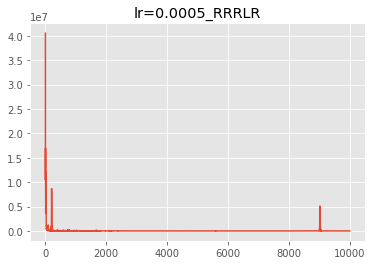

tensor(218.8876, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
# 손실 그래프
plt.plot(loss_array)
plt.title("lr=0.0005_RRRLR")
plt.show()
print(loss_array[-1])

In [ ]:
model = model_RRRLR()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0002)
model.to(device)
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(final_train_tensor).to(device)
    loss = loss_func(output,train_y_tensor)
    if i%1000==0:
        print(loss)
    loss.backward()
    optimizer.step()
    loss_array.append(loss)

tensor(7725928.5000, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(7151.9966, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(31342.8203, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(5864.6211, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(3355.1101, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1041.5259, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2898.9993, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2320.8613, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(813.8175, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(306.7185, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
model = model_RRRR()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0005)
model.to(device)
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(final_train_tensor).to(device)
    loss = loss_func(output,train_y_tensor)
    if i%1000==0:
        print(loss)
    loss.backward()
    optimizer.step()
    loss_array.append(loss)

tensor(88838728., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(6955.7974, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(5976.5698, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(7903.1162, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(5816.8589, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(621.4550, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(178.6750, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(140.7881, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(57.2482, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.8540, device='cuda:0', grad_fn=<NllLossBackward>)


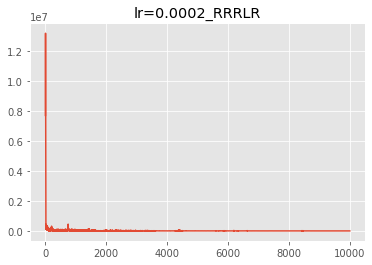

tensor(36.9545, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
# 손실 그래프
plt.plot(loss_array)
plt.title("lr=0.0002_RRRLR")
plt.show()
print(loss_array[-1])

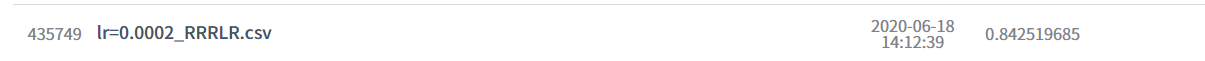

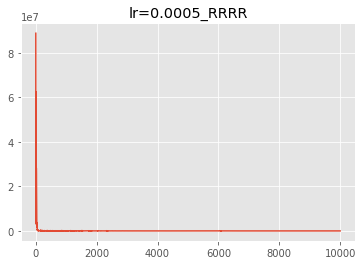

tensor(0.1018, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
plt.plot(loss_array)
plt.title("lr=0.0005_RRRR")
plt.show()
print(loss_array[-1])

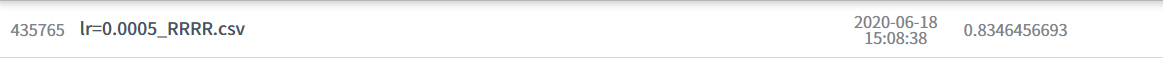

tensor(0.6759, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)


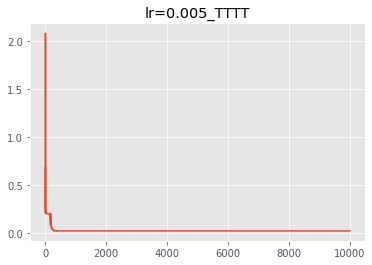

tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
model = model_TTTT()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.005)
model.to(device)
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(final_train_tensor).to(device)
    loss = loss_func(output,train_y_tensor)
    if i%1000==0:
        print(loss)
    loss.backward()
    optimizer.step()
    loss_array.append(loss)
plt.plot(loss_array)
plt.title("lr=0.005_TTTT")
plt.show()
print(loss_array[-1])

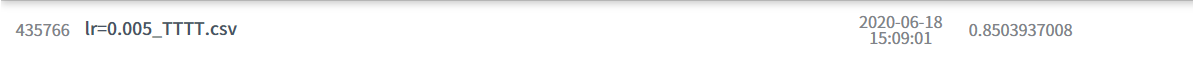

tensor(22342502., device='cuda:0', grad_fn=<NllLossBackward>)
tensor(69337.3594, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(22333.0840, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(8852.5781, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(10784.2744, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(8970.0195, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(984.5632, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(945.1361, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1026.5258, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(852.4100, device='cuda:0', grad_fn=<NllLossBackward>)


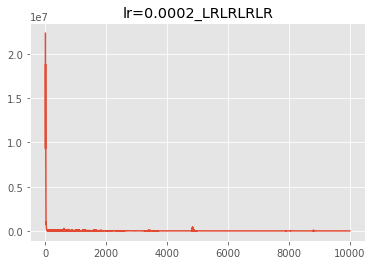

tensor(79.2826, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
model = model_LRLRLRLR()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0002)
model.to(device)
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(final_train_tensor).to(device)
    loss = loss_func(output,train_y_tensor)
    if i%1000==0:
        print(loss)
    loss.backward()
    optimizer.step()
    loss_array.append(loss)

plt.plot(loss_array)
plt.title("lr=0.0002_LRLRLRLR")
plt.show()
print(loss_array[-1])

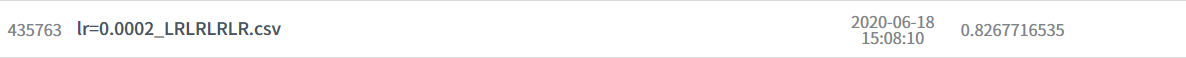

In [ ]:
# TEST
model.to(device)

output = model(test_tensor)

In [ ]:
result = []
for i in output:
    if i.argmax() == 1:
        result.append(1)
    else:
        result.append(0)
answer['OC'] = result
answer['OC']
# answer.to_csv('lr=0.0002_LRLRLRLR.csv',index=False)

## 결론

반복 수 10000번, 학습률 0.005 하이퍼볼릭 탄젠트 4번이 정확도 85%로 가장 좋은 모델.

Xgboost와 점수차이는 크게 나지 않음.